In [1]:
# Import Modules
#data manipulation
import numpy as np
import pandas as pd

#nn
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize

#visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

torch.manual_seed(1)

In [2]:
# Load the Data
df=pd.read_excel('v3_BMED_data.xlsx', sheet_name = 'Opt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       221 non-null    float64
 1   V       221 non-null    int64  
 2   E       221 non-null    float64
 3   Ci      221 non-null    float64
 4   t       221 non-null    float64
 5   CF      221 non-null    float64
 6   CA      221 non-null    float64
 7   SEC     221 non-null    float64
 8   JLA     221 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 15.7 KB


## modeling



In [3]:
# Set the training data
X_data = df[['T','V','E','Ci','t']].values
Y_data = df[['CF','CA']].values

# transform the pytorch tensor
X = torch.FloatTensor(X_data)
Y = torch.FloatTensor(Y_data)

# Declare the Custom Models
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,2)
        )

    def forward(self, x):
        return self.hidden(x)
    

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # NN model initialization
    model = CustomModel()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.01)

    # Learning Loop
    num_epochs = 10000
    
    for epoch in range(num_epochs+1):
        # forward_propagation
        Y_pred = model(X_train)
        loss = criterion(Y_pred,Y_train)

        # cost로 H(x) 개선
        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        ##weight update
        optimizer.step()

        if epoch % 1000 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
    

print("Cross validation scores : {}".format(scores))
print("Average score: {}".format(np.mean(scores)))




iter : 1, epoch: 0, loss: 2.15305233001709
iter : 1, epoch: 1000, loss: 0.025113165378570557
iter : 1, epoch: 2000, loss: 0.017982471734285355
iter : 1, epoch: 3000, loss: 0.014109602198004723
iter : 1, epoch: 4000, loss: 0.012240839190781116
iter : 1, epoch: 5000, loss: 0.011467107571661472
iter : 1, epoch: 6000, loss: 0.0233787652105093
iter : 1, epoch: 7000, loss: 0.012011750601232052
iter : 1, epoch: 8000, loss: 0.01016559824347496
iter : 1, epoch: 9000, loss: 0.012219328433275223
iter : 1, epoch: 10000, loss: 0.010061158798635006
iter : 2, epoch: 0, loss: 1.5718780755996704
iter : 2, epoch: 1000, loss: 0.0332457534968853
iter : 2, epoch: 2000, loss: 0.029690662398934364
iter : 2, epoch: 3000, loss: 0.03130925074219704
iter : 2, epoch: 4000, loss: 0.028165116906166077
iter : 2, epoch: 5000, loss: 0.023034077137708664
iter : 2, epoch: 6000, loss: 0.02447812259197235
iter : 2, epoch: 7000, loss: 0.030283180996775627
iter : 2, epoch: 8000, loss: 0.01686559058725834
iter : 2, epoch: 90

Epoch [1000/20000], Loss: 0.061725
Epoch [2000/20000], Loss: 0.091006
Epoch [3000/20000], Loss: 0.036937
Epoch [4000/20000], Loss: 0.025266
Epoch [5000/20000], Loss: 0.020834
Epoch [6000/20000], Loss: 0.020510
Epoch [7000/20000], Loss: 0.018243
Epoch [8000/20000], Loss: 0.020670
Epoch [9000/20000], Loss: 0.018887
Epoch [10000/20000], Loss: 0.017254
Epoch [11000/20000], Loss: 0.018474
Epoch [12000/20000], Loss: 0.018098
Epoch [13000/20000], Loss: 0.019863
Epoch [14000/20000], Loss: 0.015685
Epoch [15000/20000], Loss: 0.020107
Epoch [16000/20000], Loss: 0.014831
Epoch [17000/20000], Loss: 0.019604
Epoch [18000/20000], Loss: 0.021498
Epoch [19000/20000], Loss: 0.016321
Epoch [20000/20000], Loss: 0.019020
tensor([[ 0.4245, -0.0330],
        [ 0.2687,  0.2035],
        [ 0.1137,  0.4422],
        [ 0.4405, -0.0081],
        [ 0.5076,  0.0254],
        [ 0.3146,  0.0559],
        [ 0.3276,  0.1327],
        [ 0.2207,  0.2614],
        [ 0.4708, -0.0260],
        [ 0.5397,  0.0378],
        [

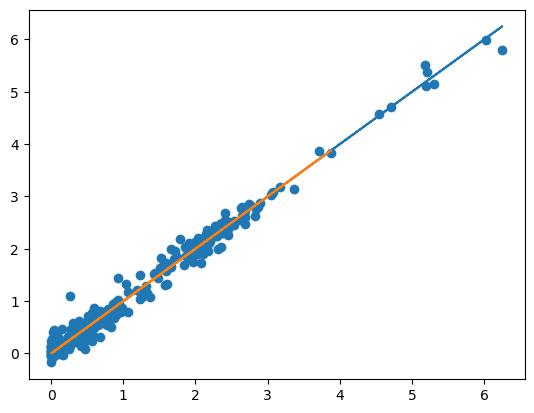

In [4]:
model= CustomModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

# Learning Loop
num_epochs = 20000
losses = []

for epoch in range(num_epochs+1):
    # forward_propagation
    y_pred = model(X)
    loss = criterion(y_pred,Y)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')



y_pred2 = model(X)
print(y_pred)


plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

0.9860654230427215

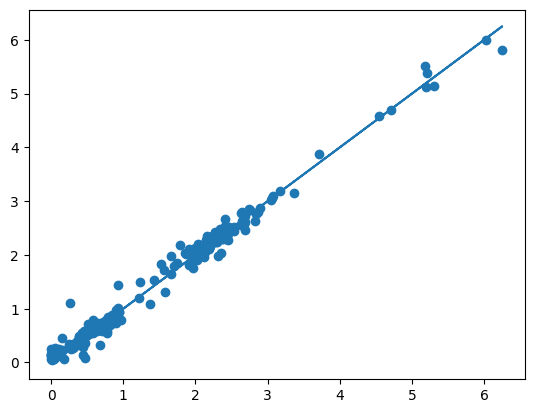

In [5]:
y_num = y_pred2.detach().numpy()
Y_num = Y.detach().numpy()
y_CF = [i[0] for i in y_num]
y_CA = [i[1] for i in y_num]
Y_CF = [i[0] for i in Y_num]
Y_CA = [i[1] for i in Y_num]

plt.scatter(Y_CF,y_CF)
plt.plot(Y_CF,Y_CF)
r2_score(Y_CF, y_CF)


0.9544950534372908

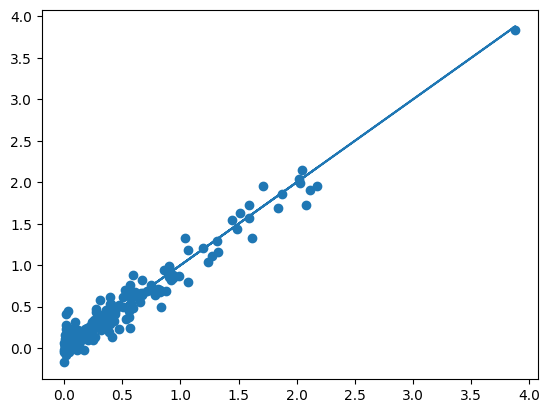

In [6]:
plt.scatter(Y_CA,y_CA)
plt.plot(Y_CA,Y_CA)
r2_score(Y_CA, y_CA)

In [7]:
torch.save(model.state_dict(), 'model.pth')